# Discover and Visualize the Data to Gain Insights

### Import the training set

In [1]:
import os
import pandas as pd
import numpy as np 
from pandas.plotting import scatter_matrix
# The following is to make some plots along the way 
import seaborn as sns 
import matplotlib.pyplot as plt

DATA_PATH = "datasets"

def load_train_data(data_path:str = DATA_PATH) -> pd.DataFrame:
    """read the data from csv and return panda data from,"""
    csv_path = os.path.join(data_path,"train.csv")
    return pd.read_csv(csv_path)

def load_test_data(data_path:str = DATA_PATH) -> pd.DataFrame:
    """read the data from csv and return panda data from,"""
    csv_path = os.path.join(data_path,"test.csv")
    return pd.read_csv(csv_path)

# sklearn tools:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import QuantileTransformer
from sklearn.preprocessing import Normalizer
from sklearn.pipeline import make_pipeline
from sklearn.feature_selection import SelectKBest, chi2, SelectPercentile
from sklearn.model_selection import cross_val_score
# modeler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold

In [2]:
train_set = load_train_data()
test_set = load_test_data()
df_cancer = train_set
df_cancer.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,0,9.029,17.33,58.79,250.5,0.10660,0.14130,0.31300,0.04375,0.2111,...,10.31,22.65,65.50,324.7,0.14820,0.43650,1.25200,0.17500,0.4228,0.11750
1,1,21.090,26.57,142.70,1311.0,0.11410,0.28320,0.24870,0.14960,0.2395,...,26.68,33.48,176.50,2089.0,0.14910,0.75840,0.67800,0.29030,0.4098,0.12840
2,0,9.173,13.86,59.20,260.9,0.07721,0.08751,0.05988,0.02180,0.2341,...,10.01,19.23,65.59,310.1,0.09836,0.16780,0.13970,0.05087,0.3282,0.08490
3,0,10.650,25.22,68.01,347.0,0.09657,0.07234,0.02379,0.01615,0.1897,...,12.25,35.19,77.98,455.7,0.14990,0.13980,0.11250,0.06136,0.3409,0.08147
4,0,10.170,14.88,64.55,311.9,0.11340,0.08061,0.01084,0.01290,0.2743,...,11.02,17.45,69.86,368.6,0.12750,0.09866,0.02168,0.02579,0.3557,0.08020


In [3]:
df_cancer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 455 entries, 0 to 454
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                455 non-null    int64  
 1   radius_mean              455 non-null    float64
 2   texture_mean             455 non-null    float64
 3   perimeter_mean           455 non-null    float64
 4   area_mean                455 non-null    float64
 5   smoothness_mean          455 non-null    float64
 6   compactness_mean         455 non-null    float64
 7   concavity_mean           455 non-null    float64
 8   concave points_mean      455 non-null    float64
 9   symmetry_mean            455 non-null    float64
 10  fractal_dimension_mean   455 non-null    float64
 11  radius_se                455 non-null    float64
 12  texture_se               455 non-null    float64
 13  perimeter_se             455 non-null    float64
 14  area_se                  4

In [4]:
df_cancer.describe()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,...,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000
mean,0.371429,14.117635,19.185033,91.882242,654.377582,0.095744,0.103619,0.088898,0.048280,0.181099,...,16.235103,25.535692,107.103121,876.987033,0.131532,0.252742,0.274595,0.114182,0.290502,0.083868
std,0.483719,3.535815,4.266005,24.322027,354.943187,0.013923,0.052470,0.079468,0.038060,0.027487,...,4.811267,6.065108,33.374664,567.672841,0.023083,0.155014,0.209398,0.065326,0.063151,0.017848
min,0.000000,7.691000,9.710000,47.920000,170.400000,0.052630,0.019380,0.000000,0.000000,0.116700,...,8.678000,12.020000,54.490000,223.600000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,0.000000,11.705000,16.170000,75.100000,420.300000,0.085825,0.062890,0.029320,0.020340,0.161850,...,13.055000,21.045000,84.255000,516.450000,0.114400,0.144950,0.116550,0.063930,0.249500,0.071050
50%,0.000000,13.300000,18.680000,85.980000,551.700000,0.094620,0.090970,0.061540,0.033410,0.179200,...,14.970000,25.220000,97.670000,686.600000,0.130900,0.210100,0.226400,0.098610,0.282700,0.080060
75%,1.000000,15.740000,21.585000,103.750000,767.600000,0.104550,0.131300,0.132350,0.073895,0.195800,...,18.410000,29.690000,124.650000,1031.500000,0.146050,0.341600,0.387200,0.161100,0.317750,0.092070
max,1.000000,28.110000,39.280000,188.500000,2501.000000,0.163400,0.311400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.218400,0.937900,1.252000,0.291000,0.663800,0.173000


# Looking for Correlations

In [5]:
corr_matrix = df_cancer.corr(method='pearson')

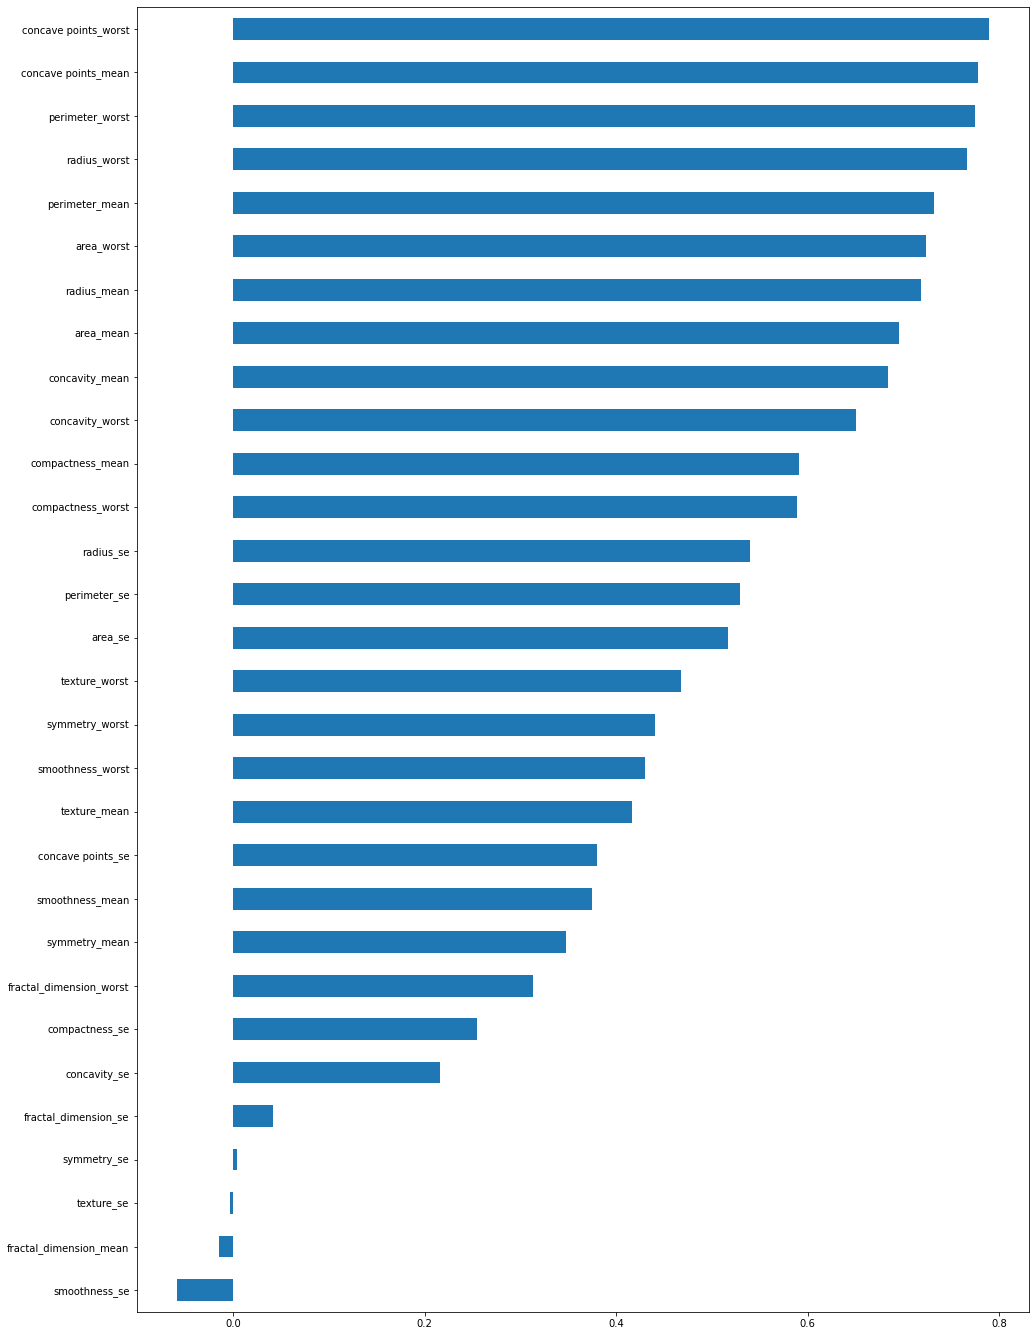

In [6]:
corr_vector=corr_matrix["diagnosis"].sort_values(ascending=True)[:-1]
corr_vector.plot.barh(figsize=(16,24));


In [7]:
important_attributes=corr_vector[corr_vector > 0.5].index.tolist()
important_attributes.append('diagnosis')
less_important = corr_vector[corr_vector <= 0.5].index.tolist()
less_important.append('diagnosis')

In [8]:
figure_most=sns.pairplot(df_cancer[important_attributes], hue="diagnosis");
figure_most.savefig(r"plots/corr_big.png")
figure_least=sns.pairplot(df_cancer[less_important], hue="diagnosis");
figure_least.savefig(r"plots/corr_less_corr.png")

# Choose some intresting ones

In [9]:
attributes =['diagnosis',
             'area_mean',
             'radius_mean',
             'area_worst',
             'perimeter_mean',
             'radius_worst']

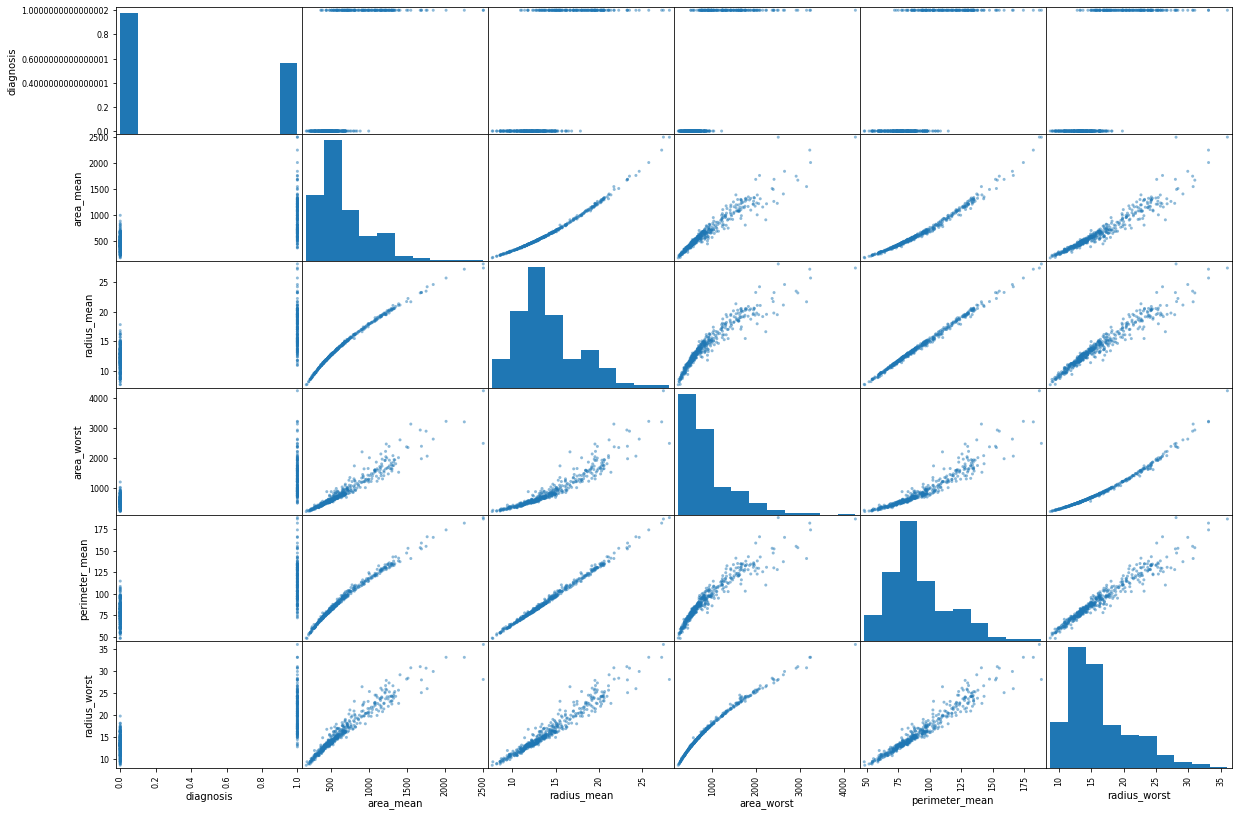

In [10]:
scatter_matrix(df_cancer[attributes], figsize=(20, 14));

In [11]:
#figure=sns.pairplot(df_cancer[attributes], hue="diagnosis");
#figure.savefig(r"plots/corr.png")

In [12]:
H_A= ['perimeter_worst',
 'concave points_mean',
 'concave points_worst']

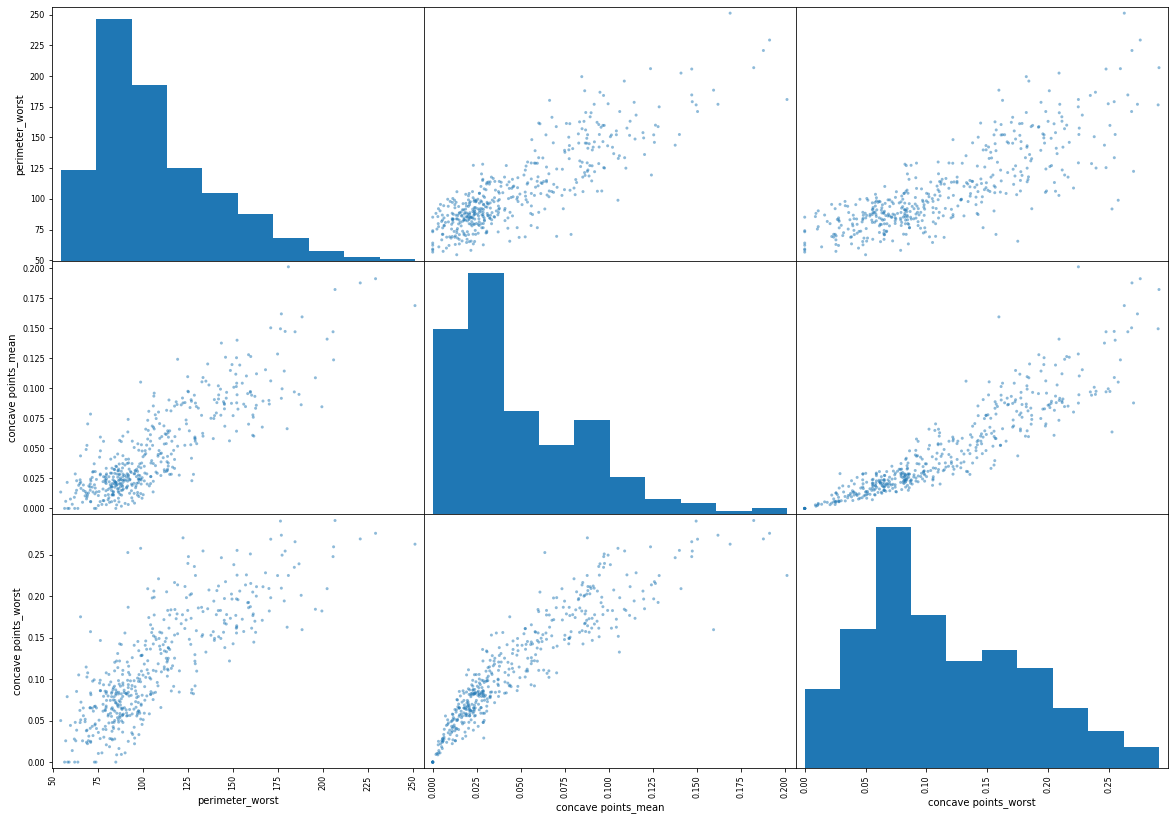

In [13]:
scatter_matrix(df_cancer[H_A], figsize=(20, 14));

# devide to X and Y

In [14]:
X, y = train_set.drop('diagnosis',axis=1), train_set['diagnosis']
X_test,y_test= test_set.drop('diagnosis',axis=1), test_set['diagnosis']

In [15]:
X

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,9.029,17.33,58.79,250.5,0.10660,0.14130,0.31300,0.04375,0.2111,0.08046,...,10.310,22.65,65.50,324.7,0.14820,0.43650,1.25200,0.17500,0.4228,0.11750
1,21.090,26.57,142.70,1311.0,0.11410,0.28320,0.24870,0.14960,0.2395,0.07398,...,26.680,33.48,176.50,2089.0,0.14910,0.75840,0.67800,0.29030,0.4098,0.12840
2,9.173,13.86,59.20,260.9,0.07721,0.08751,0.05988,0.02180,0.2341,0.06963,...,10.010,19.23,65.59,310.1,0.09836,0.16780,0.13970,0.05087,0.3282,0.08490
3,10.650,25.22,68.01,347.0,0.09657,0.07234,0.02379,0.01615,0.1897,0.06329,...,12.250,35.19,77.98,455.7,0.14990,0.13980,0.11250,0.06136,0.3409,0.08147
4,10.170,14.88,64.55,311.9,0.11340,0.08061,0.01084,0.01290,0.2743,0.06960,...,11.020,17.45,69.86,368.6,0.12750,0.09866,0.02168,0.02579,0.3557,0.08020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
450,8.888,14.64,58.79,244.0,0.09783,0.15310,0.08606,0.02872,0.1902,0.08980,...,9.733,15.67,62.56,284.4,0.12070,0.24360,0.14340,0.04786,0.2254,0.10840
451,11.640,18.33,75.17,412.5,0.11420,0.10170,0.07070,0.03485,0.1801,0.06520,...,13.140,29.26,85.51,521.7,0.16880,0.26600,0.28730,0.12180,0.2806,0.09097
452,14.290,16.82,90.30,632.6,0.06429,0.02675,0.00725,0.00625,0.1508,0.05376,...,14.910,20.65,94.44,684.6,0.08567,0.05036,0.03866,0.03333,0.2458,0.06120
453,13.980,19.62,91.12,599.5,0.10600,0.11330,0.11260,0.06463,0.1669,0.06544,...,17.040,30.80,113.90,869.3,0.16130,0.35680,0.40690,0.18270,0.3179,0.10550


In [32]:
scaler = Normalizer()
scaler.fit(X)
selection = SelectKBest(chi2,k=10)
qt = QuantileTransformer(n_quantiles=20, random_state=0)
lg_clf = LogisticRegression()

In [33]:
lg_pipe = make_pipeline(qt,selection,clf)
skf = StratifiedKFold(5,shuffle=True,random_state=0)
cross_val_score(pipe,X,y,cv=skf,scoring='accuracy').mean()


0.9252747252747253

In [18]:
pipe.fit(X,y)

Pipeline(steps=[('quantiletransformer',
                 QuantileTransformer(n_quantiles=20, random_state=0)),
                ('selectkbest',
                 SelectKBest(score_func=<function chi2 at 0x7f8afb2a95e0>)),
                ('logisticregression', LogisticRegression())])

In [19]:
pipe.predict(X_test)

array([0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 1])

In [20]:
pipe.score(X_test,y_test)

0.9736842105263158

In [21]:
pipe.named_steps.logisticregression.coef_

array([[0.38719112, 0.37769322, 0.50462657, 1.33701946, 1.91491278,
        2.02237275, 1.72033296, 2.11928529, 1.85600743, 2.17536356]])

In [22]:
used=pipe.named_steps.selectkbest.get_support()

In [23]:
X.columns[used]

Index(['radius_mean', 'perimeter_mean', 'area_mean', 'concavity_mean',
       'concave points_mean', 'radius_worst', 'perimeter_worst', 'area_worst',
       'concavity_worst', 'concave points_worst'],
      dtype='object')

In [24]:
used_list=used.tolist()

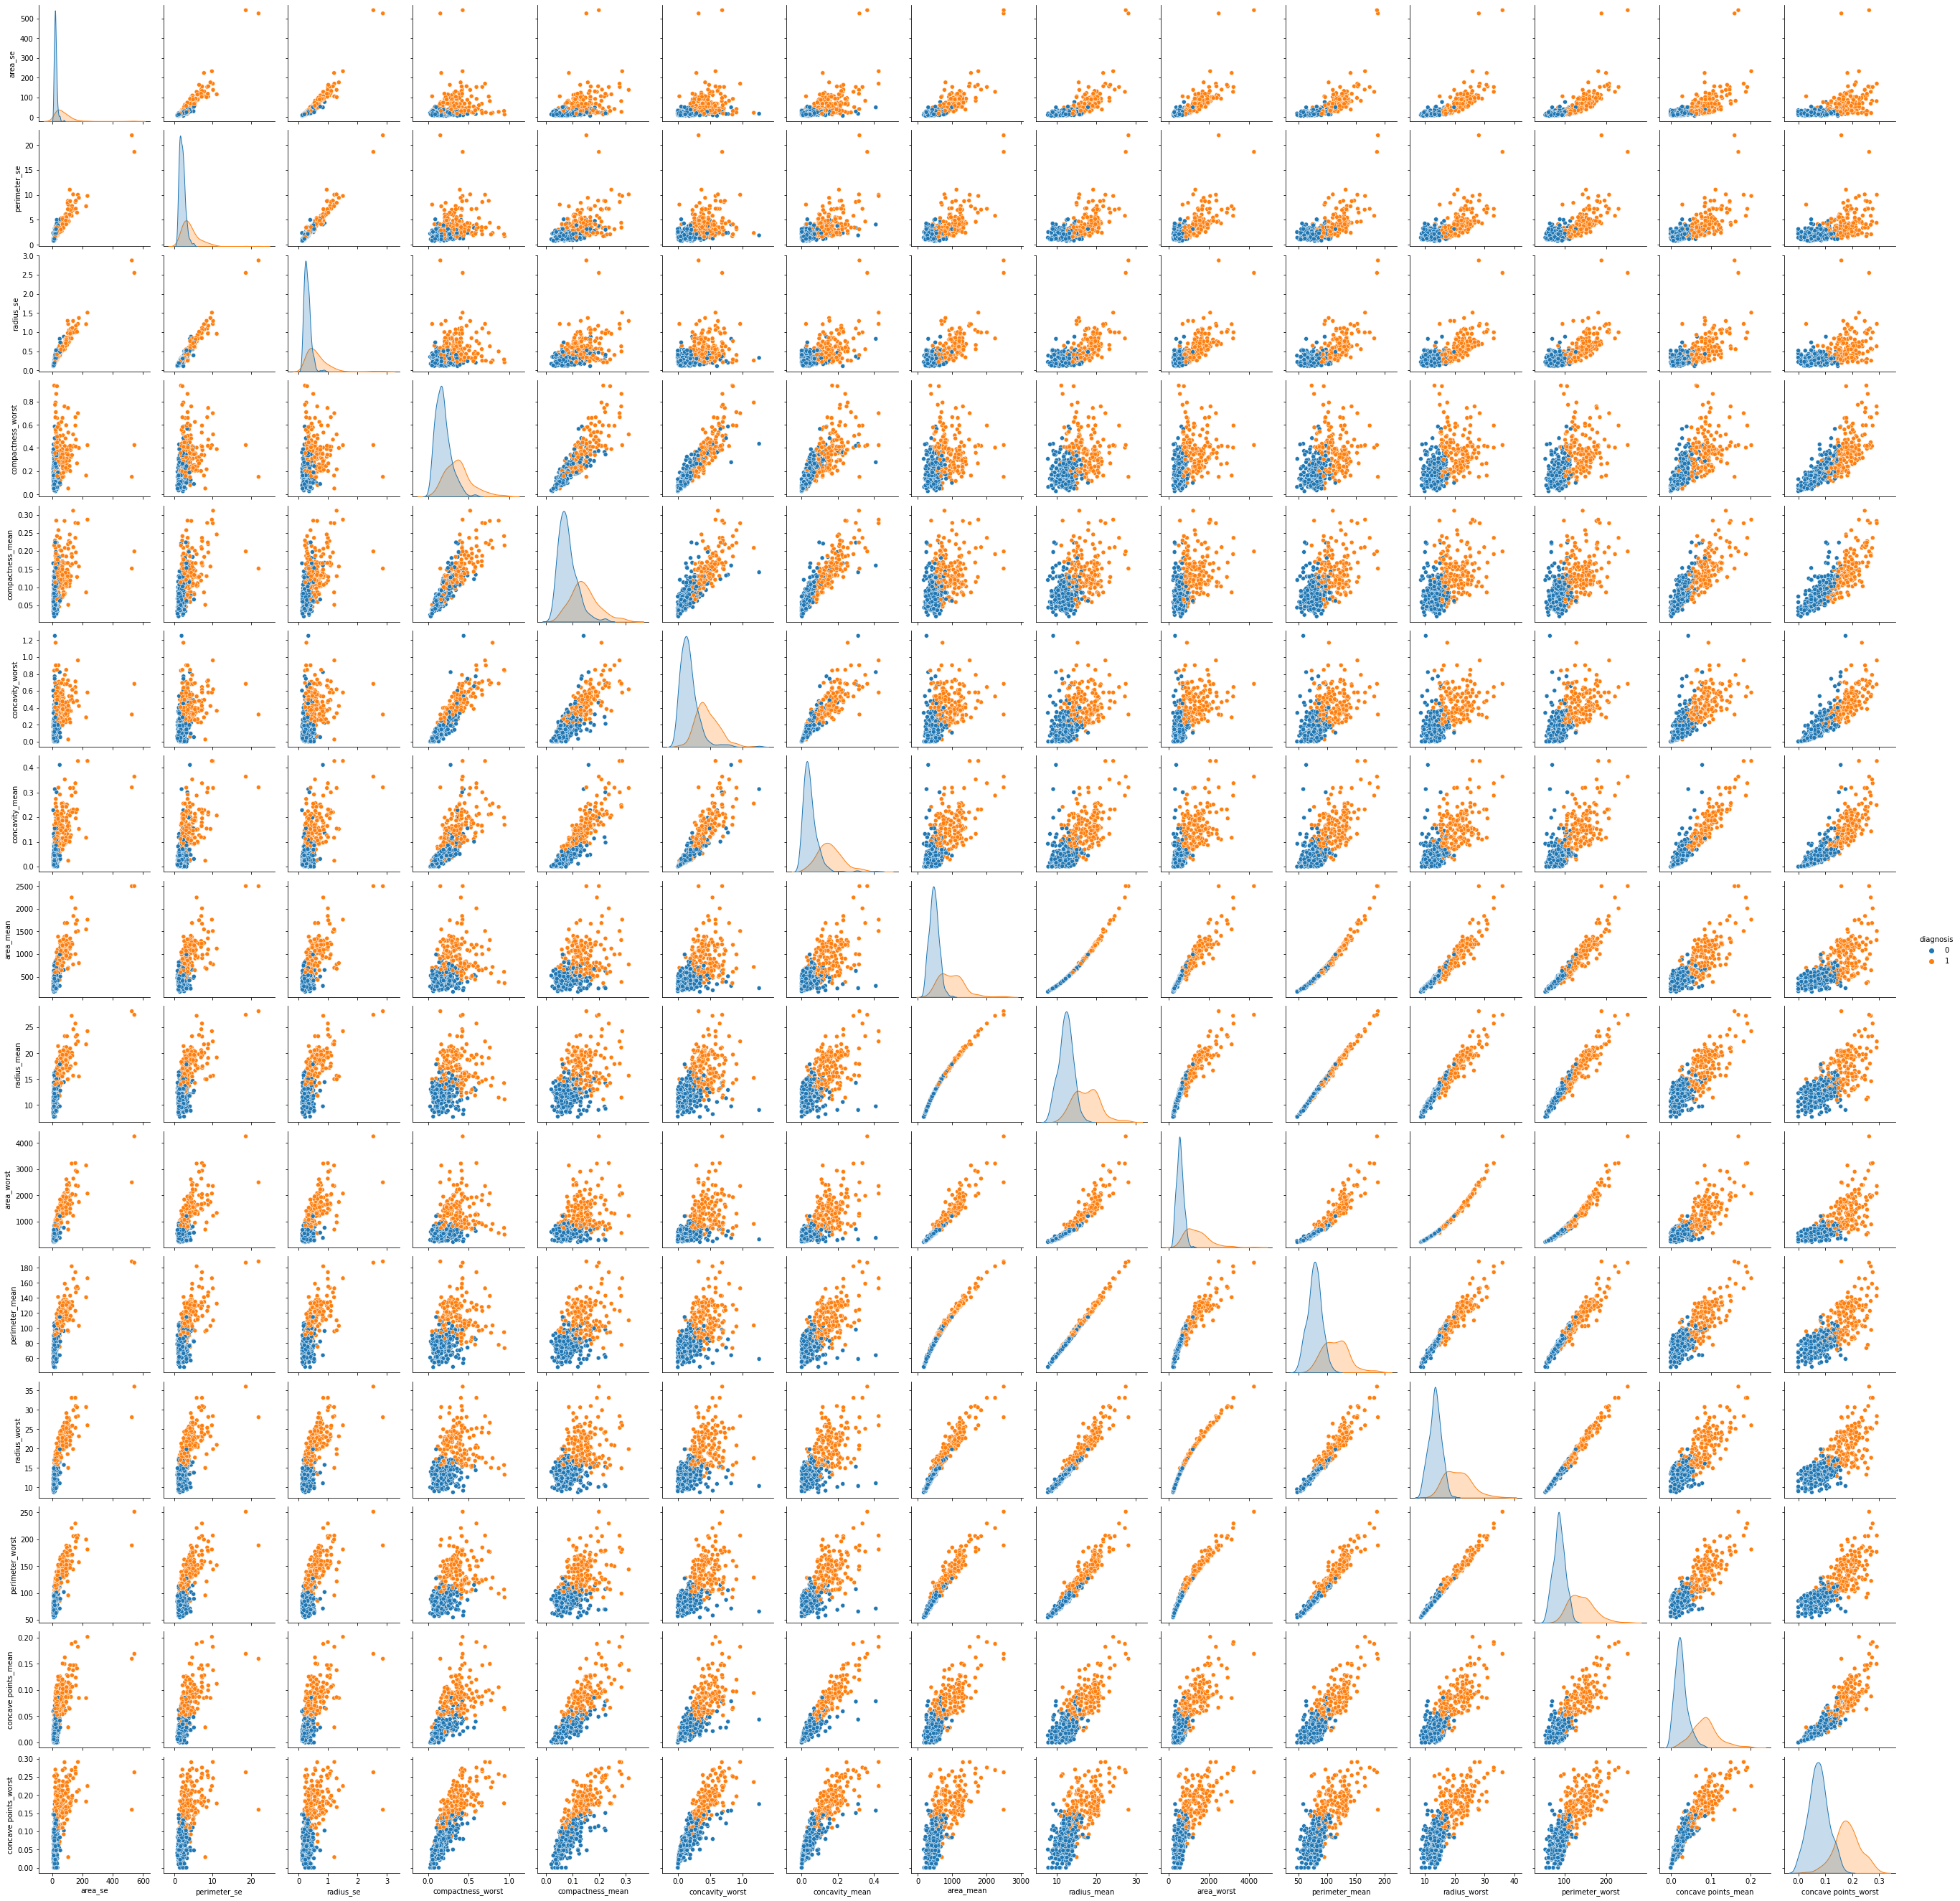

In [25]:
used_list.append('diagnosis')
figure_most_important=sns.pairplot(df_cancer[important_attributes], hue="diagnosis");
figure_most_important.savefig(r"plots/corr_important.png")

In [ ]:
qt = QuantileTransformer(n_quantiles=20, random_state=0)
lg_clf = LogisticRegression()
lg_pipe = make_pipeline(qt,selection,lg_clf)

In [ ]:
estimators = [xgb_clf]
for estimator in estimators:
    print("select FE in the", estimator.__class__.__name__)
    selector = RFECV(estimator, step=1, cv=5)
    selector.fit(X_train, y_train)

In [ ]:
selector = RFECV(estimator, step=1, cv=5)